In [2]:
import polars as pl
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
%config InlineBackend.figure_formats = ['svg']
plt.rcParams["figure.figsize"] = (10, 6)
def show():
    os.makedirs("plots", exist_ok=True)
    plt.savefig("plots/" + plt.gcf().axes[0].get_title() + ".pdf")
    plt.show()
data = pl.read_csv("/home/exyi/tmp/basepaircsv/cWW-CG-dssr.csv")
data = data.with_columns(
    pl.col("hb_0_heavy_a_angle") / np.pi * 180,
    pl.col("hb_1_heavy_a_angle") / np.pi * 180,
    pl.col("hb_2_heavy_a_angle") / np.pi * 180
)

print(data.schema)
geomDF = data[["dssr_shear","dssr_stretch","dssr_stagger","dssr_buckle","dssr_propeller","dssr_opening","dssr_shift","dssr_slide","dssr_rise","dssr_tilt","dssr_roll","dssr_twist", "hb_0_length", "hb_0_heavy_a_angle", "hb_1_length", "hb_1_heavy_a_angle", "hb_2_length", "hb_2_heavy_a_angle"]]
# corr = geomDF.filter(pl.col("dssr_propeller").is_not_null() & pl.col("dssr_twist").is_not_null() & pl.col("hb_0_length").is_not_null()).corr()
# print(corr)
# sns.heatmap(data=corr.select(pl.col(corr.columns).abs()), annot=True, cmap="YlGnBu").set(title="Correlation matrix")
# plt.legend(["propeller", "opening", "buckle"])
# show()

# sns.histplot(data=data[["dssr_propeller", "dssr_opening", "dssr_buckle"]], bins=100, legend=True).set(title="DSSR angles")
# plt.legend(["propeller", "opening", "buckle"])
# show()

# sns.histplot(data=data[["dssr_shear", "dssr_stretch", "dssr_stagger"]], bins=100, legend=True).set(title="DSSR shift")
# plt.legend(["shear", "stretch", "stagger"])
# show()

# sns.histplot(data, x="dssr_propeller", y="dssr_buckle", bins=100).set(title="DDSR opening_buckle", xlabel="length (Å)", ylabel="angle (°)")
# show()
# sns.histplot(data, x="dssr_stretch", y="dssr_opening", bins=100).set(title="DDSR stretch_opening", xlabel="length (Å)", ylabel="angle (°)")
# show()
# sns.histplot(data, x="hb_1_heavy_a_angle", y="hb_2_heavy_a_angle", bins=100).set(title="O2 - N2 H-Bond", xlabel="length (Å)", ylabel="angle (°)")
# show()

plt.figure(figsize=(8, 8))
sns.pairplot(data=geomDF[["dssr_propeller", "dssr_opening", "dssr_buckle", "dssr_shear", "dssr_stretch", "dssr_stagger", "hb_1_length", "hb_1_heavy_a_angle"]].to_pandas(), diag_kind="kde", kind="kde").set("pairplot of everything")
show()


{'pdbid': Utf8, 'model': Int64, 'chain1': Utf8, 'res1': Utf8, 'nr1': Int64, 'ins1': Utf8, 'atom1': Utf8, 'alt1': Utf8, 'chain2': Utf8, 'res2': Utf8, 'nr2': Int64, 'ins2': Utf8, 'atom2': Utf8, 'alt2': Utf8, 'image': Int64, 'dist': Float64, 'rmsd': Float64, 'tx': Float64, 'ty': Float64, 'tz': Float64, 'r11': Float64, 'r12': Float64, 'r13': Float64, 'r21': Float64, 'r22': Float64, 'r23': Float64, 'r31': Float64, 'r32': Float64, 'r33': Float64, 't1MMB': Float64, 't2MMB': Float64, 't3MMB': Float64, 'theta': Float64, 'axMMB': Float64, 'ayMMB': Float64, 'azMMB': Float64, 'hb_0_length': Float64, 'hb_0_heavy_a_angle': Float64, 'hb_1_length': Float64, 'hb_1_heavy_a_angle': Float64, 'hb_2_length': Float64, 'hb_2_heavy_a_angle': Float64, 'bogopropeller': Utf8, 'dssr_pairing_type': Utf8, 'dssr_shear': Float64, 'dssr_stretch': Float64, 'dssr_stagger': Float64, 'dssr_buckle': Float64, 'dssr_propeller': Float64, 'dssr_opening': Float64, 'dssr_shift': Float64, 'dssr_slide': Float64, 'dssr_rise': Float6

/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


TypeError: _BaseGrid.set() takes 1 positional argument but 2 were given

<Figure size 800x800 with 0 Axes>

In [2]:
sns.histplot(data=data[["hb_0_heavy_a_angle", "hb_1_heavy_a_angle", "hb_2_heavy_a_angle"]], bins=100).set(title="CG pair H-Bond angle between heavy atoms")
plt.legend(["N4 - O6", "N3 - N1", "O2 - N2"])
show()


NameError: name 'sns' is not defined

NameError: name 'sns' is not defined

[Text(0.5, 1.0, 'DSSR angles')]

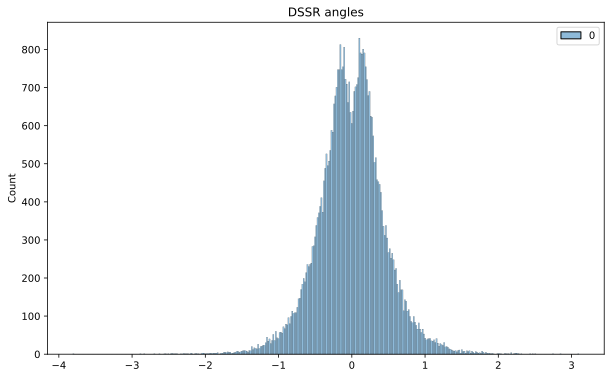

In [8]:
# sns.histplot(data, x="hb_1_length", y="hb_1_heavy_a_angle", bins=100).set(title="N1 - N3 H-Bond", xlabel="length (Å)", ylabel="angle (°)")
sns.histplot(data=data[["dssr_shear"]], bins=400, legend=True).set(title="DSSR angles")


In [24]:
print(data.__len__())
data.filter(pl.col("hb_2_heavy_a_angle").is_not_null()).null_count()


68661


pdbid,model,chain1,res1,nr1,ins1,atom1,alt1,chain2,res2,nr2,ins2,atom2,alt2,image,dist,rmsd,tx,ty,tz,r11,r12,r13,r21,r22,r23,r31,r32,r33,t1MMB,t2MMB,t3MMB,theta,axMMB,ayMMB,azMMB,hb_0_length,hb_0_heavy_a_angle,hb_1_length,hb_1_heavy_a_angle,hb_2_length,hb_2_heavy_a_angle,bogopropeller,dssr_pairing_type,dssr_shear,dssr_stretch,dssr_stagger,dssr_buckle,dssr_propeller,dssr_opening,dssr_shift,dssr_slide,dssr_rise,dssr_tilt,dssr_roll,dssr_twist
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64875,23216,23216,23216,23216,23216,23216,23216,23439,23439,23439,23439,23439,23439
